## Introduction

Diabetes is a significant health issue that impacts millions of individuals globally, and its prevalence continues to rise. The condition arises when the body is unable to make enough insulin(a hormone that controls blood sugar levels) or cannot use insulin properly. This causes blood levels to rise, which leads to several issues. Heart disease, Vision problems, assumption, and kidney disease can arise from high blood sugar levels in diabetics. As there is no cure, diabetes can be managed through weight loss, having healthy foods, regular exercise, and proper medical treatments. Prefounding diabetes is important, which allows effective treatment methods and makes changes to lifestyle accordingly. This leads to making predictive models for diabetes risk, which are valuable tools for healthcare professionals, policymakers, and people around the world. Through the help of this healthcare officials can develop better treatment and prevention care.

The dataset is sourced from the Behavioural Risk Factor Surveillance System (BRFSS) for the year 2015, which provides rich information, including demographic details, health behaviors, and diabetes status. My Analysis begins with Understanding the data, Data pre-processing where I clean the data, handle the duplicate values and prepare it for further analysis, using features such as `BMI`(Body Mass Index), `HighBP`(High Blood Pressure), `GenHlth`(General Health), `MentHlth`(Mental Health), `PhysHlth`(Physical Health) and several other variables, along with their relationship to diabetes.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

### Importing the Diabities Dataset

Pandas is a popular Python library used for data manipulation and analysis. Python provides various functionality such as reading or writing various files, such as CSV, JSON, SQL Databases, etc. It can be also used for data cleaning, data manipulating, and data transforming, which includes filtering, sorting, grouping, and merging two sets of data into a single data. Moreover, it helps to handle the missing and duplicate values and allows to perform accurate statistical analysis.

In [3]:
#importing diabities dataset
diabities_data =pd.read_csv(r"C:\Users\redch\OneDrive\Desktop\MA 336 Final Project\diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
diabities_data.head() #pops the first five rows and all columns of the dataframe.

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#storing the columns names into a variable for futhure use
column_names = diabities_data.columns
column_names

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
diabities_data.shape #shows the dimension of the dataframe.
print(f"The data frame consist of {diabities_data.shape[0]} rows and {diabities_data.shape[1]} columns.")

The data frame consist of 253680 rows and 22 columns.


In [7]:
diabities_data.info() # check is there any null values and datatype of each column in dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

The above dataset consists of 253680 values and 22 columns. We can clearly notice that there are no missing values or null values in the dataset(the `not-null` count is the same as the total count). Every row indicates each person's health status. Here the `Diabities_binary` column is the target variable, which indicates does the person has diabetes or not, '0' indicates the person does not have diabetes, and '1' indicates the person does have diabetes. Datatypes of all the columns are in float64 which is an integer datatype.

In [8]:
diabities_data.describe().T # provides a summary statistics of the data.

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


The result shows the statistical summary of the data, as we can make several observations from the datasets. From the `Diabetes_binary` we can see that around 13.93% of people have diabetes. We can notice that `BMI`, `GenHlth`, `MentHlth`, `PhysHlth`, `Age`, `Education`, `Income` are said to be continuous variables and other variables are binary. 

#### Handling Duplicate Values in the Dataset

In [9]:
# Handle duplicates
duplicate_rows_data = diabities_data[diabities_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (24206, 22)


We are checking for duplicate values in the dataset as it is an important step in data preprocessing. Duplicate values can be identified using `duplicated()` and we can drop these using the function `drop_duplicates()`. We can confirm that the data consists of 24206 duplicate values. Dropping those duplicate values can reduce the dataset size, it can make it easier to work with data. Working with duplicate values can lead to inaccuracy in data reporting and analysis, which can lead to inaccurate prediction. Thus removing those duplicate values helps ensure the data accurately reflects the real-world phenomena.

In [10]:
# Droping the duplicate values
diabities_data = diabities_data.drop_duplicates()
# Making a copy of the data after droping the duplicates and storing it as a new dataframe for further process
df_clean = diabities_data.copy()

In [11]:
df_clean.shape # Checking weather the duplicates are dropped by checking the dimension of data

(229474, 22)

In [12]:
# Checking for null values
df_clean.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
# unique value in each column
for col in column_names:
    print(f"Unique values in {col}: {df_clean[col].unique()},No of values {len(df_clean[col].unique())}")
    print("*"*100)

Unique values in Diabetes_binary: [0. 1.],No of values 2
****************************************************************************************************
Unique values in HighBP: [1. 0.],No of values 2
****************************************************************************************************
Unique values in HighChol: [1. 0.],No of values 2
****************************************************************************************************
Unique values in CholCheck: [1. 0.],No of values 2
****************************************************************************************************
Unique values in BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.],No of values 84
**********

There are no null values in the cleaned datasets. I have printed the unique values of every column, as well as the values that are unique in each column. Through this, we can see that many columns are binary.

In [14]:
def data_label(binary):
    """This function labels the binary value for diabetes if 0 No and elif 1 Yes

    Args:
        binary (_float_): o or 1 values
    """
    if binary == 0:
        return "Non Diabetic"
    elif binary == 1:
        return "Diabetic"

In [15]:
""" Creating a new column in the data named Binary Label
    Using the Function data_label we are labeling Diabetic or Non-Diabetic
    
    Labels Non-Diabetic if 0
    
    labels Diabetic if 1
"""
df_clean["Binary_Label"] = df_clean["Diabetes_binary"].apply(data_label)

In [18]:
# An alternative aprroach done for different column which replaces female for 0 and male for 1
df_clean["Gender_Label"] = df_clean["Sex"].replace({0:"Female",1:"Male"})

In [19]:
df_clean.head() #Checking the Last two columns created 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Binary_Label,Gender_Label
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,Non Diabetic,Female
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,Non Diabetic,Female
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,Non Diabetic,Female
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,Non Diabetic,Female
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,Non Diabetic,Female


In [20]:
def age_label(age):
    """The function labels the values into a certain group of ages. Each values assumed to be interval of age.
    
       1 assumes people between the age of 18 to 24
       2 assumes people between the age og 25 to 29
       simlarly.....
    """
    if age == 1:
        return '18 to 24'
    elif age == 2:
        return '25 to 29'
    elif age == 3:
        return '30 to 34'
    elif age == 4:
        return '35 to 39'
    elif age == 5:
        return '40 to 44'
    elif age == 6:
        return '45 to 49'
    elif age == 7:
        return '50 to 54'
    elif age == 8:
        return '55 to 59'
    elif age == 9:
        return '60 to 64'
    elif age == 10 :
        return '65 to 69'
    elif age == 11:
        return '70 to 74'
    elif age == 12:
        return '75 to 79'
    elif age == 13:
        return '80 or older'

In [21]:
# Applying the age_label function to the Age columns and replaces the values
df_clean["Age"] = df_clean["Age"].apply(age_label)

## Univariate Analysis

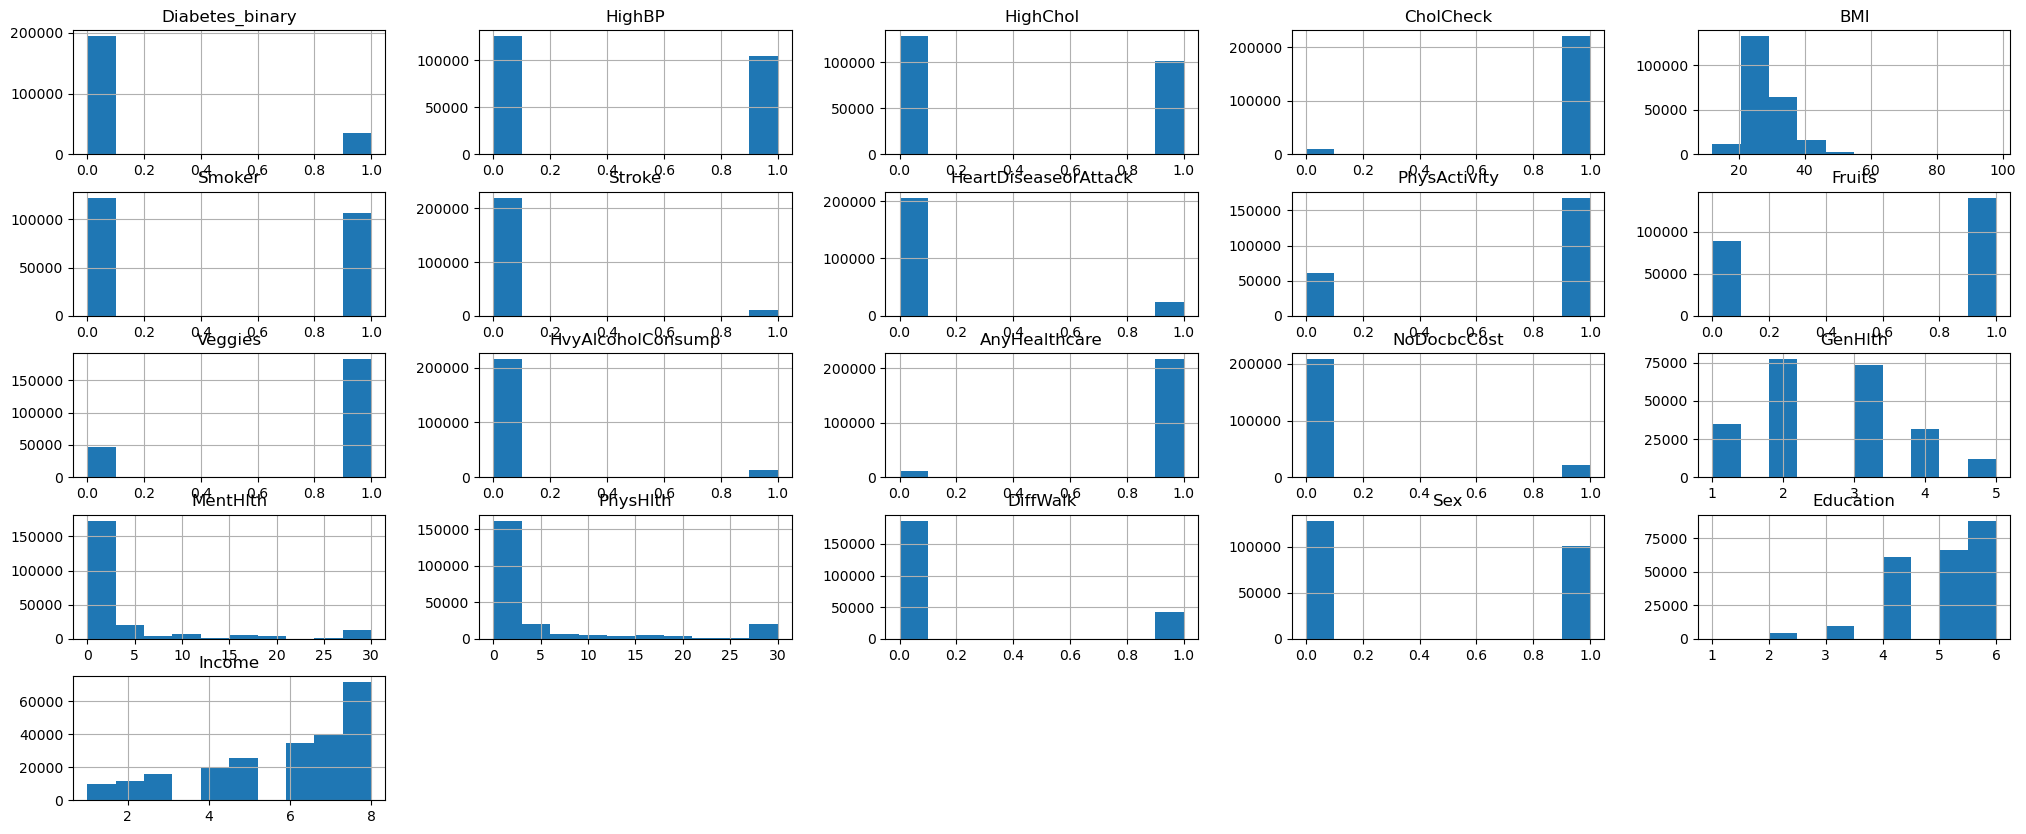

In [22]:
#Ploting Histogram for each and every column.
df_clean.hist(figsize = (25,10))
plt.show()

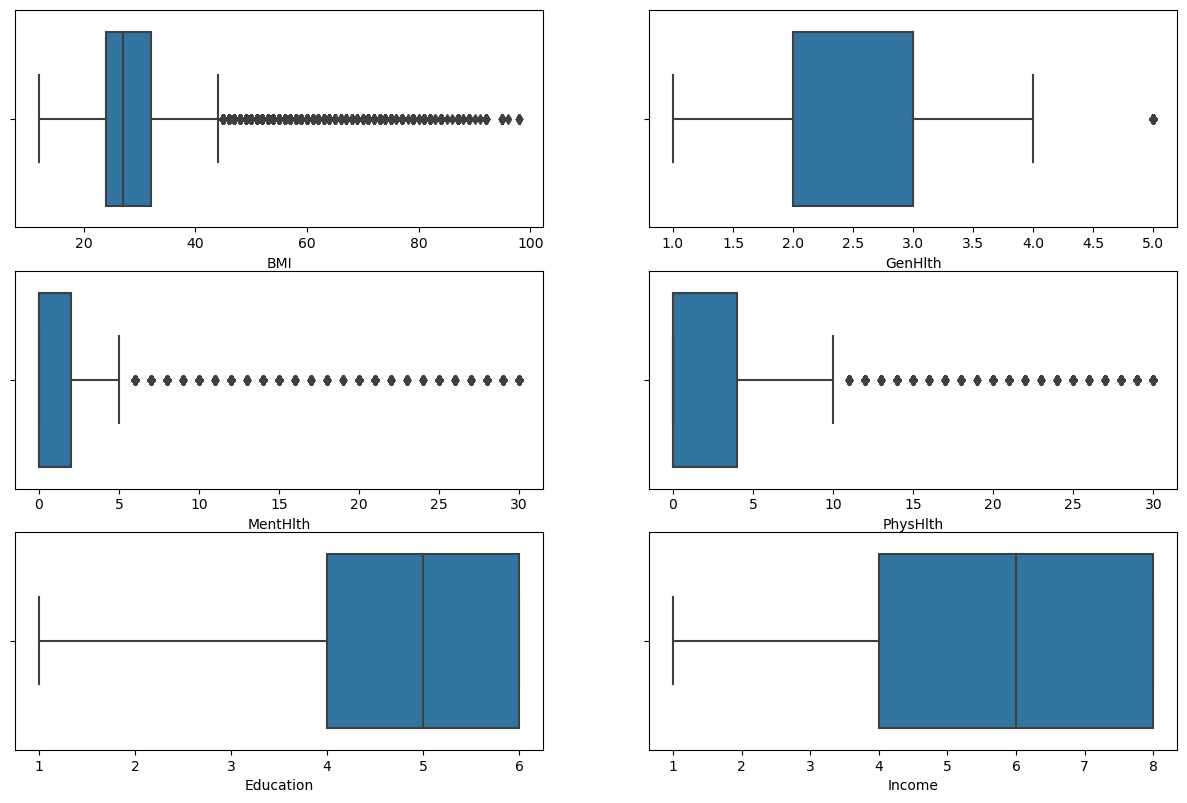

In [23]:
#checking for outlier
plt.figure(figsize = (15,13))
for i,column in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']): # Plots Each column one by one
    plt.subplot(4,2,i+1)
    sns.boxplot(x = column, data = df_clean ) # creates a boxplot
    
plt.show()

We can see that `BMI`, `MentHlth`, and `PhysHlth` has high outliers. This outlier should not be removed in this analysis. If we remove that may lead to inaccurate analysis as these values are important for predicting whether the person has diabetes or not. Hence we are not removing these outliers, instead we keeping them for further analysis. Moreover most values of `Education` and `Income` lie on the 3rd quantile or upper.

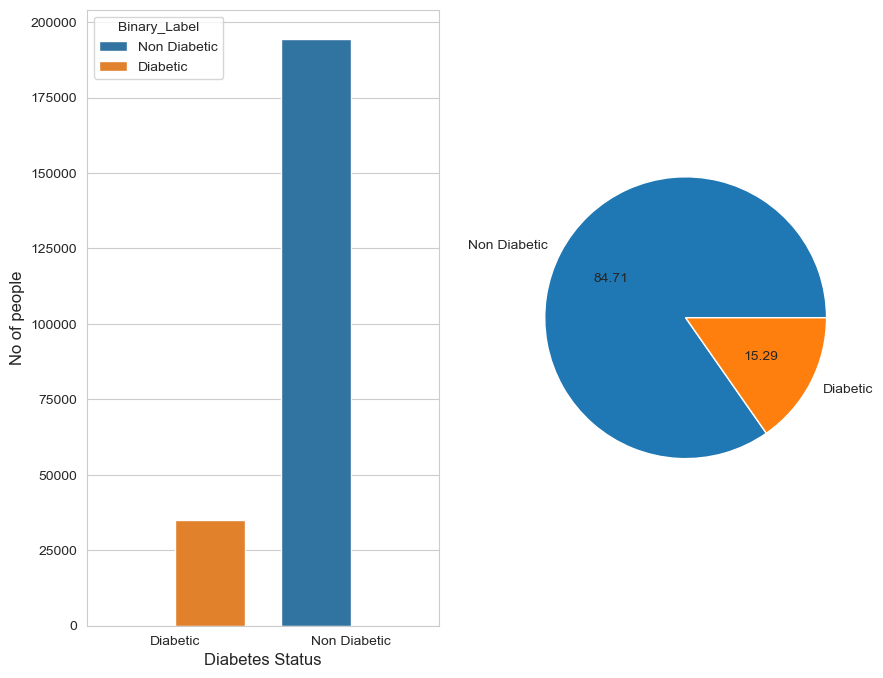

In [24]:
sns.set_style("whitegrid")
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))
# Checking for class imbalance
# Creating a countplot for the distribution of diabetes status
ax = sns.countplot(x=df_clean["Binary_Label"],hue=df_clean["Binary_Label"],order=["Diabetic","Non Diabetic"],ax=plot1[0])

ax.set_xlabel("Diabetes Status", fontsize=12)  # x-axis label
ax.set_ylabel("No of people", fontsize=12)   

# Creating a pie chart for the distribution of diabetes status
labels =   ["Non Diabetic","Diabetic"]
plt.pie(df_clean["Binary_Label"].value_counts(),labels=labels,autopct='%.02f')
plt.show()

As already we noticed in the statistical analysis before, we can see that people with diabetes are more than people with Diabetes. The pie graph indicates people with diabetes are 15.29% of the overall data and the rest 84.71% are Non-diabetic. 

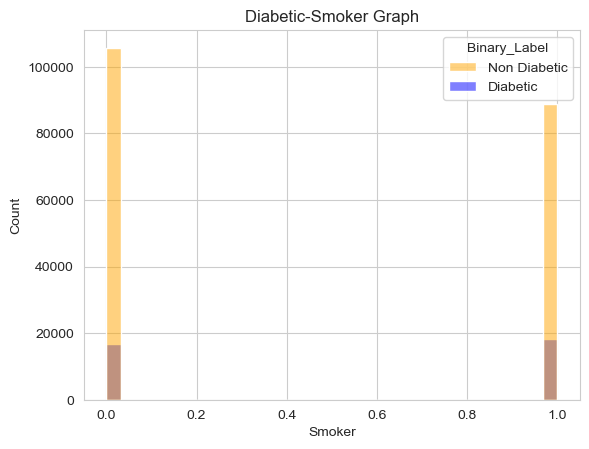

In [25]:
sns.color_palette("rocket")
# Creating a histogram plot of 'Smoker' column with 'Binary_Label' as hue
sns.histplot(data=df_clean,hue="Binary_Label",x = "Smoker",palette=["orange", "blue"])
plt.title('Diabetic-Smoker Graph')
plt.show()

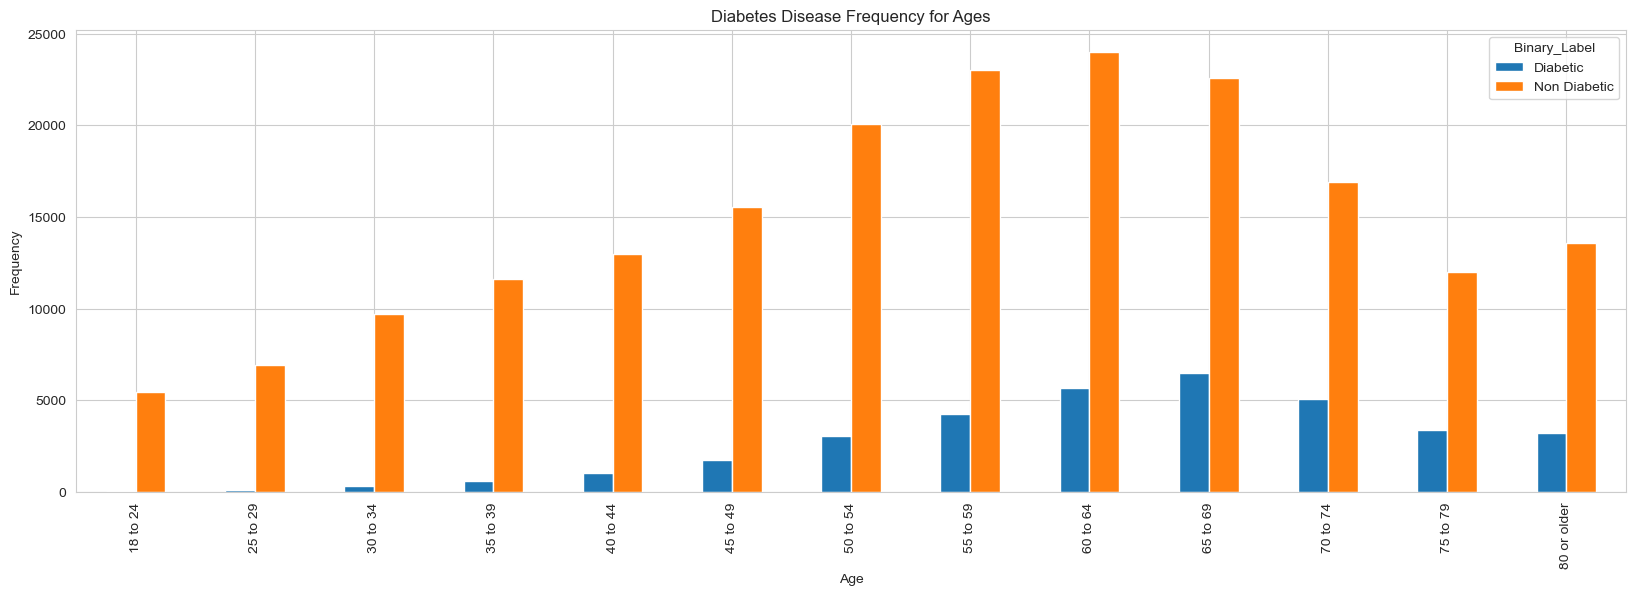

In [26]:
# Creating a cross-tabulation of age and binary label (Diabetic/Non-Diabetic) and plotting it as a bar chart
pd.crosstab(df_clean.Age,df_clean.Binary_Label).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age') # label x-axis
plt.ylabel('Frequency') # label y-axis
plt.show()

The `Diabetic-smoker` graph indicates how many smokers and non-smokers are diabetic and non-diabetic. Similarly, the `Diabetes Disease Frequency for Ages` graph indicates the number of people who are diabetic and non-diabetic in each group age. It seems that people below age 35 have significantly less chance of being diabetic. The probability of people getting affected by diabetics is mostly after the age of 35. People between the ages 60 to 74 are more diabetic comparing any other age group, count exceeds more than 5000.

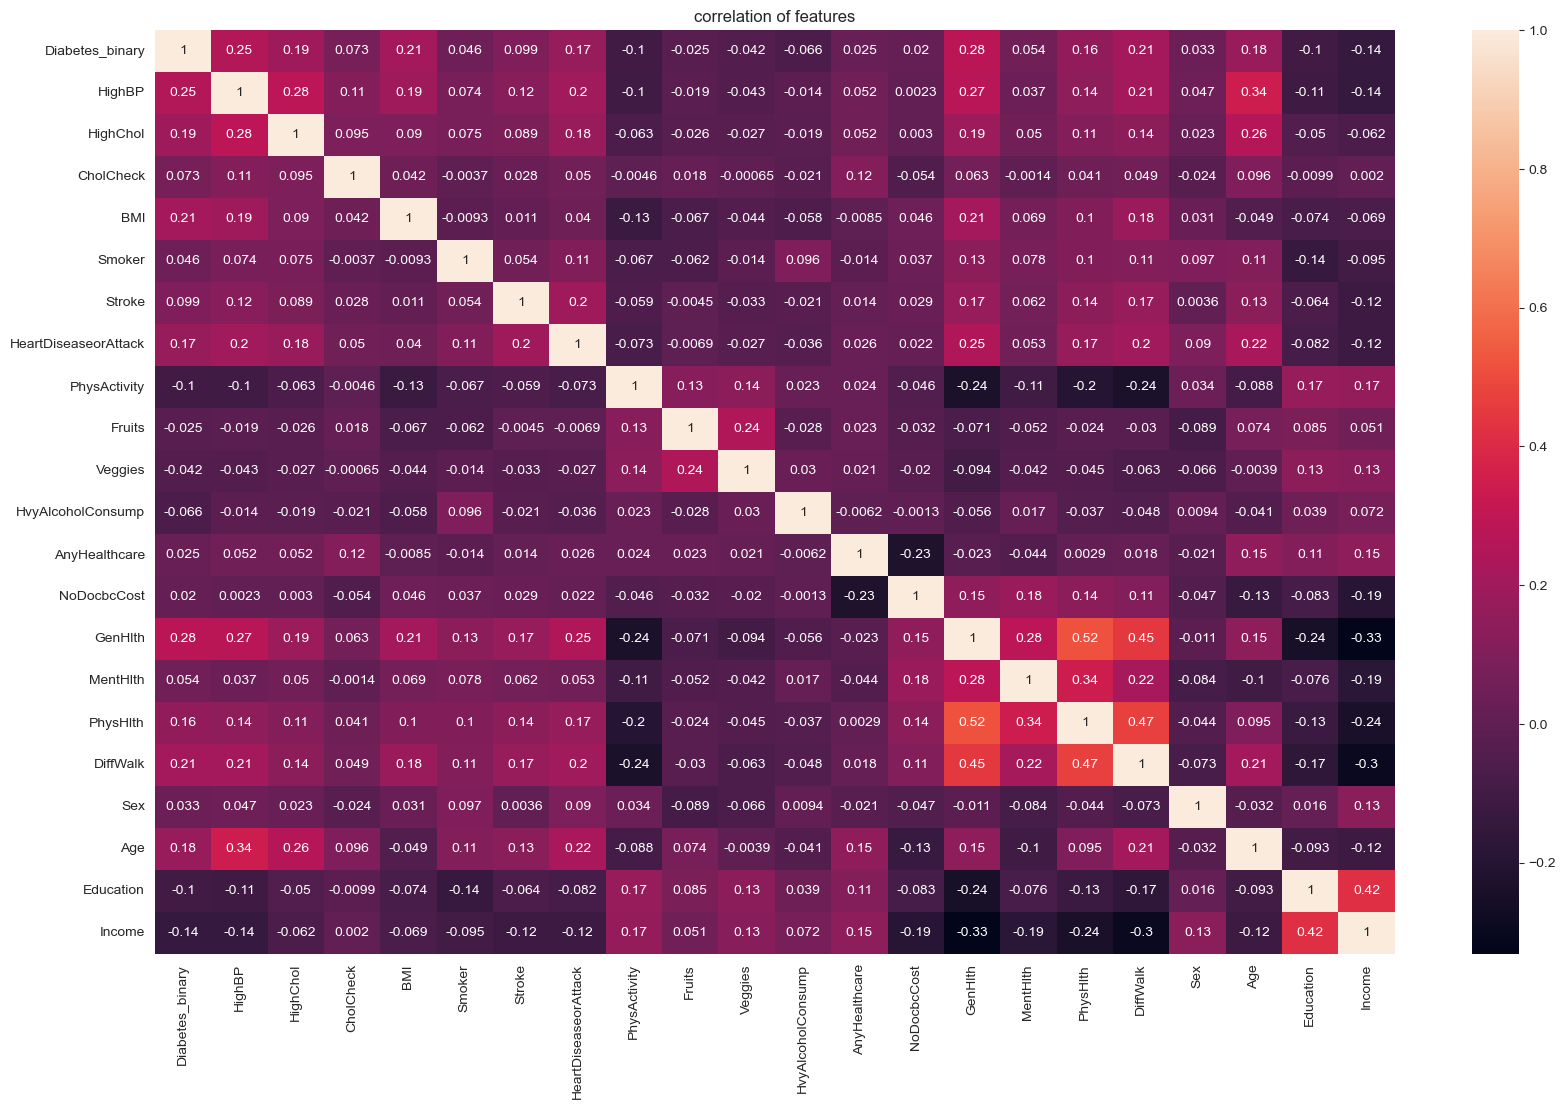

In [27]:
plt.figure(figsize = (20,12))
# Creating a heatmap for understanding the relationship between the health indicators
sns.heatmap(diabities_data.corr(),annot=True)
plt.title("correlation of features")
plt.show()

The heat map shows the correlation or relationship between the different variables in the dataset. 1 Indicates the strong positive relationship and -1 indicates the strong negative relationship between the different variables. The above heat map shows the correlation between the different variables as it is important for predicting the target variables.

<Axes: title={'center': 'Correlation with Diabetes(Target Variable)'}>

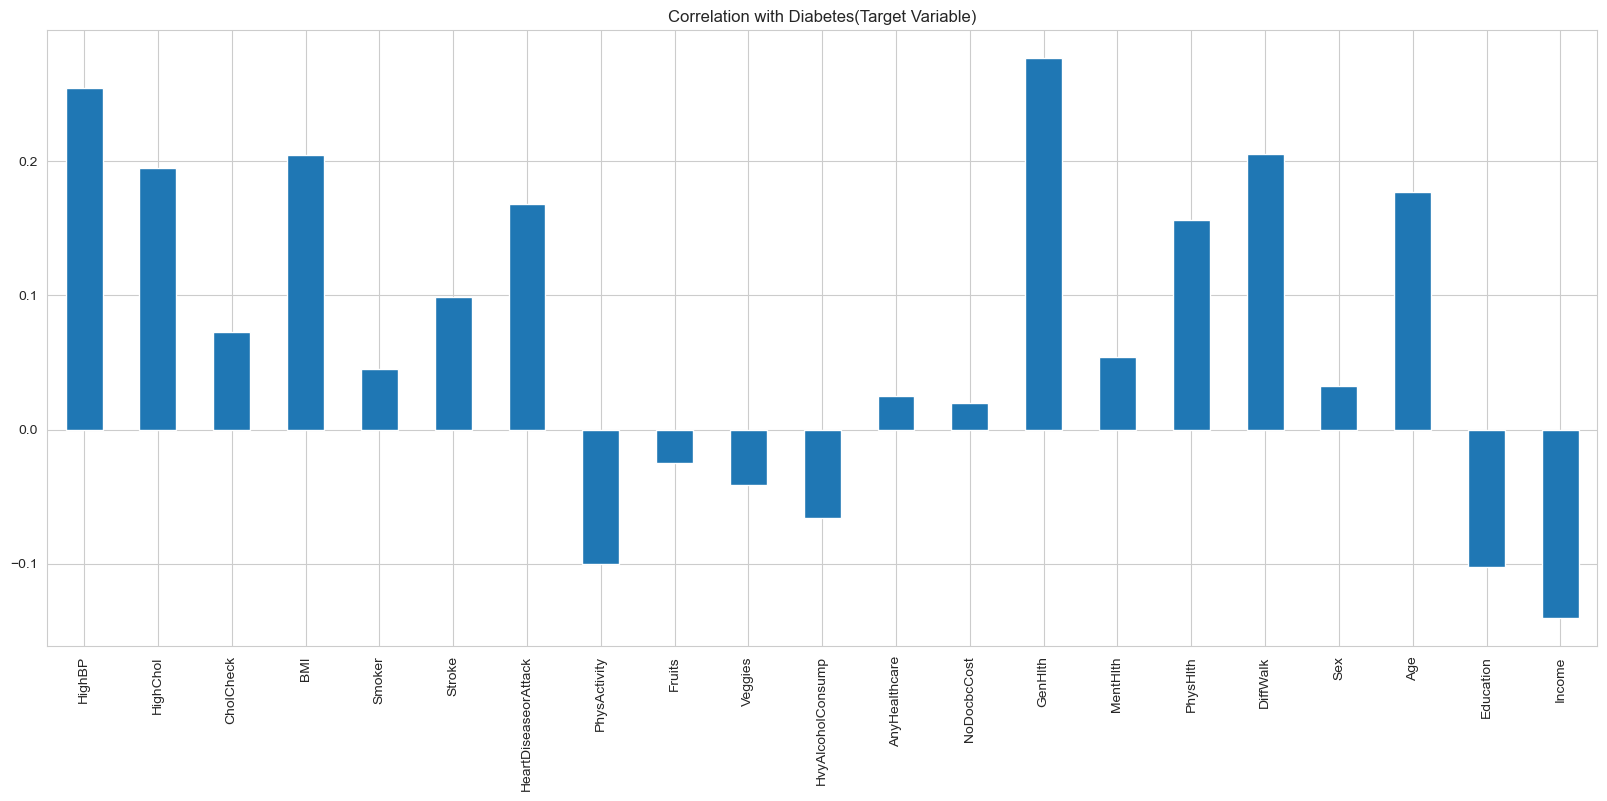

In [28]:
# checking whether health-indicators has positive/negative relationships on predicting diabetics.
diabities_data.drop('Diabetes_binary', axis=1).corrwith(diabities_data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes(Target Variable)")

From the above graph, we can understand that the six columns which show a negative correlation, don't affect predicting the target values. So we are dropping those columns to make the prediction accurate and precise.  Other variables that show a positive relationship help in predicting the target variable.

In [29]:
#Droping the columns 
diabities_data = diabities_data.drop(columns=["PhysActivity","Fruits","Veggies","HvyAlcoholConsump","Education","Income"])

#### Since the data is imbalanced we gonna perform SMOTETOMEK to resample the data points

As we can see the data has an imbalance in the `Diabetes_binary`, which indicates whether an individual has diabetes or not. In our data we can see that more people are labeled as "Non-Diabetic" (0) than people labeled as "Diabetic" (1). This Imbalance indicates there is a significant difference in number of people in each group.

This Imbalance creates challenges for the machine learning model to train and make accurate predictions. Models trained on imbalanced data may favor the majority group, leading to less accurate predictions for the minority group. In our case, this means the models might not be as good at identifying people who are at risk of diabetes, which is very important for healthcare.To fix this problem and make our models better, we can use resampling methods such as [Oversampling and Undersampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis). These methods help balance the dataset by either adding more of the minority class (oversampling) or reducing the majority class (undersampling), or doing both. Balancing the dataset helps the model learn from both classes equally, which makes it better at predicting outcomes on new data.

To balance this data, I choose [SMOTETomek](https://www.kaggle.com/code/jagunn/smotetomek-a-beginners-guide)/[SMOTETomek](https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html) algorithm, which combines the [SMOTE(Synthetic Minority Over-Sampling Technique)](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE) and [Tomek links](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE). SMOTE works by generating synthetic samples for the minority class. It selects minority class instances and finds its K-Nearest Neighbors. The new instance is created somewhere between the selected instance and its neighbors, effectively creating a synthetic sample. Tomek links are pairs of neighboring instances from different classes. They are used to identify and remove overlapping data points, which can make it easier to distinguish between classes. Using SMOTETomek helps balance the dataset by oversampling the minority class and Undersampling the majority class, which leads to improved predictions, especially for conditions like diabetes.

In [30]:
X = diabities_data.drop(columns="Diabetes_binary")
y = diabities_data["Diabetes_binary"]

# Splitting the dataset into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

# intializing SMOTETomek algorithm with keeping random state as 42.
smote_tomek = SMOTETomek(random_state=42)

# Resample the training dataset
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_set, y_train_set)

## Model Building

#### Logistics Regression

We have chosen [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) as our initial model for predicting Diabetes. Logistic Regression is a type of Machine Learning model used for binary classification tasks, such as predicting whether a person has diabetes or not. It predicts by estimating the probability that an instance belongs to a particular class, such as Diabetic or Non-Diabetic based on the features like `BMI`, `Age`, `Smoker`. The model then makes predictions by comparing these probabilities to a threshold value. Logistic regression is a suitable choice for our project because of its simplicity, interpretability, and effectiveness in handling binary classification tasks with a small number of features.

In [34]:
# Running logisitc model and saving it a variable
log_model = LogisticRegression(max_iter=1500)
# fit the model to training data
log_model.fit(X_train_resampled,y_train_resampled)

LogisticRegression(max_iter=1500)

In [35]:
# predicting the x_test using fitted model
y_predict = log_model.predict(X_test_set)

In [36]:
# gives the accuracy of the model.
accuracy_score(y_test_set,y_predict)

0.7152848894215056

In [37]:
log_report = classification_report(y_test_set,y_predict)
print(log_report)

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38813
         1.0       0.32      0.75      0.45      7082

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.84      0.72      0.75     45895



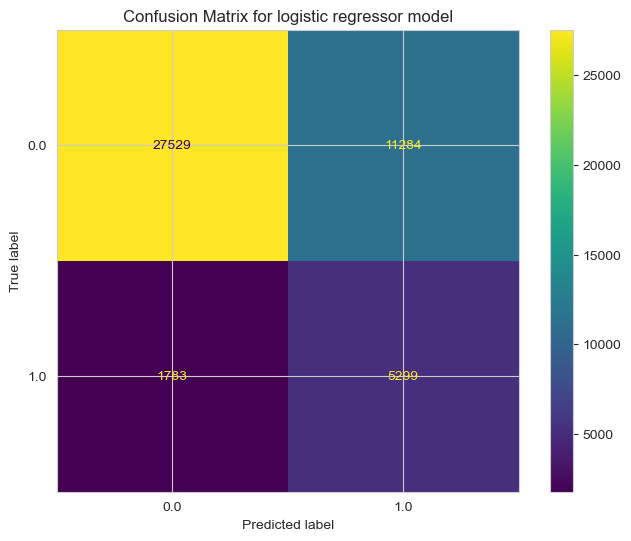

In [39]:
# Calculating the confusion matrix for the logistic regression model
con_matrix = confusion_matrix(y_test_set,y_predict)
figure1, ax = plt.subplots(figsize=(8,6),dpi=100)
# Creating a ConfusionMatrixDisplay object for the logistic regression model
display = ConfusionMatrixDisplay(con_matrix,display_labels=log_model.classes_)
ax.set(title="Confusion Matrix for logistic regressor model")
display.plot(ax=ax)

We used the Logistic Regression Model to Predict whether someone has diabetes based on their health indicators, which gave an accuracy of approximately 71.52%. This means that out of all the predictions we have made, about 71.52% were correct. Diving deep into the report, we can see precision for predicting non-diabetic is quite high at 94%, which means the model predicts someone as non-diabetic correctly 94% of the time. However, the precision for predicting diabetes is lower at 32%. Similarly, the recall for predicting Non-Diabetic individuals is 71%. But for the predicting diabetic individuals, the recall value is little higher at 75%. Finally, the F1-score, which is the balance between Precision and Recall, is 0.81 for non-diabetic individuals and 0.45 for diabetic individuals. This states that the model performs better at predicting non-diabetic cases than diabetic cases. The Logistic Model shows a better accuracy, we may need further perfection to improve its performance in predicting diabetic cases. So we further proceed with Random Forest for improving accuracy.

##### Random Forest 

Let's get into the Random Forest algorithm and see how it improves in predicting diabetics. [Random Forest](https://en.wikipedia.org/wiki/Random_forest) is an ensemble method that uses multiple decision trees for prediction. Each tree in the Random forest is trained on different subsets of data and makes its prediction independently. The Final prediction has been made depending upon the average or the majority vote of predictions made by each tree. Random Forest has a lower probability of overfitting than the logistic model since it combines predictions from multiple trees.

We are comparing the performance of Random Forest with logistic Regression, we can find out which model is a better model for predicting diabetics based on the other health variables. This can provide us valuable insights into the effectiveness of the different machine learning models and how they perform on specific tasks, aiding us in making decisions during our predictive modeling process.

In [40]:
# Creating an instance of the Random Forest model with specified parameters
RF_model = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

In [41]:
# Fitting the Random Forest model to the resampled training data
RF_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [42]:
# Making predictions on the test data using the trained Random Forest model
y_predict = RF_model.predict(X_test_set)

In [43]:
# Calculating the accuracy of the Random Forest model
accuracy_score(y_predict,y_test_set)

0.79071794313106

In [44]:
# Generating a classification report for the Random Forest model
RF_report = classification_report(y_test_set,y_predict)
print(RF_report)

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     38813
         1.0       0.38      0.56      0.45      7082

    accuracy                           0.79     45895
   macro avg       0.65      0.70      0.66     45895
weighted avg       0.83      0.79      0.81     45895



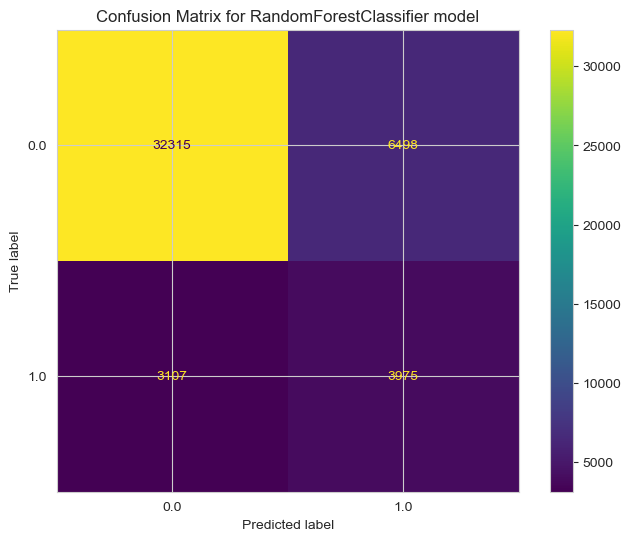

In [45]:
# Calculating the confusion matrix for the Random Forest model 
Con_matrix = confusion_matrix(y_test_set,y_predict)
figure1, ax = plt.subplots(figsize=(8,6),dpi=100)
display = ConfusionMatrixDisplay(Con_matrix,display_labels=RF_model.classes_)
ax.set(title="Confusion Matrix for RandomForestClassifier model")
display.plot(ax=ax)

The Random Forest Model has achieved a slightly higher accuracy of approximately 79.1% compared to the logistic regression model. The precision for predicting non-diabetic individuals(0) is 91%. indicating that the model correctly identifies 91% of all non-diabetic patients. The precision for predicting diabetic individuals (1) is 38%, which is higher precision than the logistic model(32%). Overall, the Random Forest model has shown improved performance compared to Logistic Regression, particularly in terms of accuracy and precision for predicting diabetic class.

## Conclusion 

In conclusion, both the Logistic Model and Random Forest were considered and evaluated for predicting diabetes based on the other health indicators. They show strength in different areas. The Random Forest has surpassed the logistic model in accuracy and prediction for predicting diabetic cases. The model can predict Diabetics about 80% accurately. however moving forward, further exploration can be done by fine-tuning the Random Forest Model by adjusting the Hyper-tuning to enhance its performance. Continuing the research and improving machine learning models in predicting diabetics can advance our understanding and management of this prevalent health disease.